In [1]:
library(dplyr)
library(forecast)
library(ggplot2)
library(gridExtra)

basePath <- 'C:\\skku\\'
train_file <- 'g_linear_amos_rtwqi0.csv'
test_file <- 'g_linear_amos_rtwqi0_test.csv'

# Read train and test data
df_train <- read.csv(paste(basePath, train_file, sep=""))
df_test <- read.csv(paste(basePath, test_file, sep=""))

#df_train
#df_test

# Preprocess train and test data================================================
df_train <- df_train %>%
  mutate(m_date = as.Date(m_date)) %>%
  group_by(m_date) %>%
  summarize_all(mean)

df_test <- df_test %>%
  mutate(m_date = as.POSIXct(m_date, format = "%Y-%m-%d %Hh")) %>%
  group_by(as.Date(m_date)) %>%
  summarize_all(mean)

# Convert columns to numeric
df_train[, -1] <- lapply(df_train[, -1], as.numeric)
df_test[, -1] <- lapply(df_test[, -1], as.numeric)

#df_selected <- df_train[, c('temp', 'ph', 'ec', 'do', 'M73', 'tn','tp','toc', 'clola.a')]
df_selected <- df_train[, c('temp', 'ph', 'ec', 'do', 'M73', 'toc', 'clola.a')]
names(df_selected)

arima_model <- list()
fc_train <- list()
fc_test <- list()
plots_train <- list()
plots_test <- list()
combined_plot_list <- list()
acc_train <- list()
acc_test <- list()
summary_model <- list()

for (i in names(df_selected)) {
  # Train data
  ts_data_train <- ts(df_selected[[i]], frequency = 1)
  arima_model[[i]] <- auto.arima(ts_data_train)
  summary_model[[i]] <- summary(arima_model[[i]])
  
  # Forecast (w/ train data)
  fc_train[[i]] <- forecast(arima_model[[i]], h = 30)
  plots_train[[i]] <- autoplot(fc_train[[i]], main = i)
  acc_train[[i]] <- accuracy(fc_train[[i]])
  
  # Test data (w/ test data)
  ts_data_test <- ts(df_test[[i]], frequency = 1)
  fc_test[[i]] <- forecast(arima_model[[i]], h = length(ts_data_test))
  fc_test[[i]] <- ts(fc_test[[i]]$mean, start = 1, frequency = 1)
  plots_test[[i]] <- autoplot(fc_test[[i]], main = i)
  acc_test[[i]] <- accuracy(fc_test[[i]], ts_data_test)
  
  df_combined <- data.frame(
    Index = time(ts_data_test),
    Value_fc = as.numeric(fc_test[[i]]),
    Value_actual = as.numeric(ts_data_test)
  )
  
  combined_plot <- ggplot(df_combined, aes(x = Index)) +
    geom_line(aes(y = Value_fc, color = "Forecasted Data")) +
    geom_line(aes(y = Value_actual, color = "Actual Test Data")) +
    labs(title = i, y = "Value") +
    scale_color_manual(values = c("red", "blue"), guide = guide_legend(title = NULL))
  
  combined_plot_list[[i]] <- combined_plot
  #print(combined_plot)
}

print("Train data accuracy:")
print(acc_train)
print("Test data accuracy:")
print(acc_test)

for (i in names(df_selected)) {
  print(paste("Summary for", i))
  print(summary_model[[i]])
}

#grid.arrange(grobs = plots_train, ncol = 2, top = "Forecasts using ARIMA - Train Data")
#grid.arrange(grobs = plots_test, ncol = 2, top = "Forecasts using ARIMA - Compare Test Data", ylab = "test data")
grid.arrange(grobs = combined_plot_list, ncol = 2, top = "Forecasts using ARIMA - Compare Test Data", ylab = "test data")


# Save ARIMA model
filename_parts <- strsplit(train_file, split = ".", fixed = TRUE)[[1]]
substring <- filename_parts[1]

modelName <- paste0("arima_model_", substring, ".rds")
saveRDS(arima_model, modelName)




SyntaxError: invalid syntax (<ipython-input-1-5788a0a27de8>, line 18)

### 한강 train data + 예측

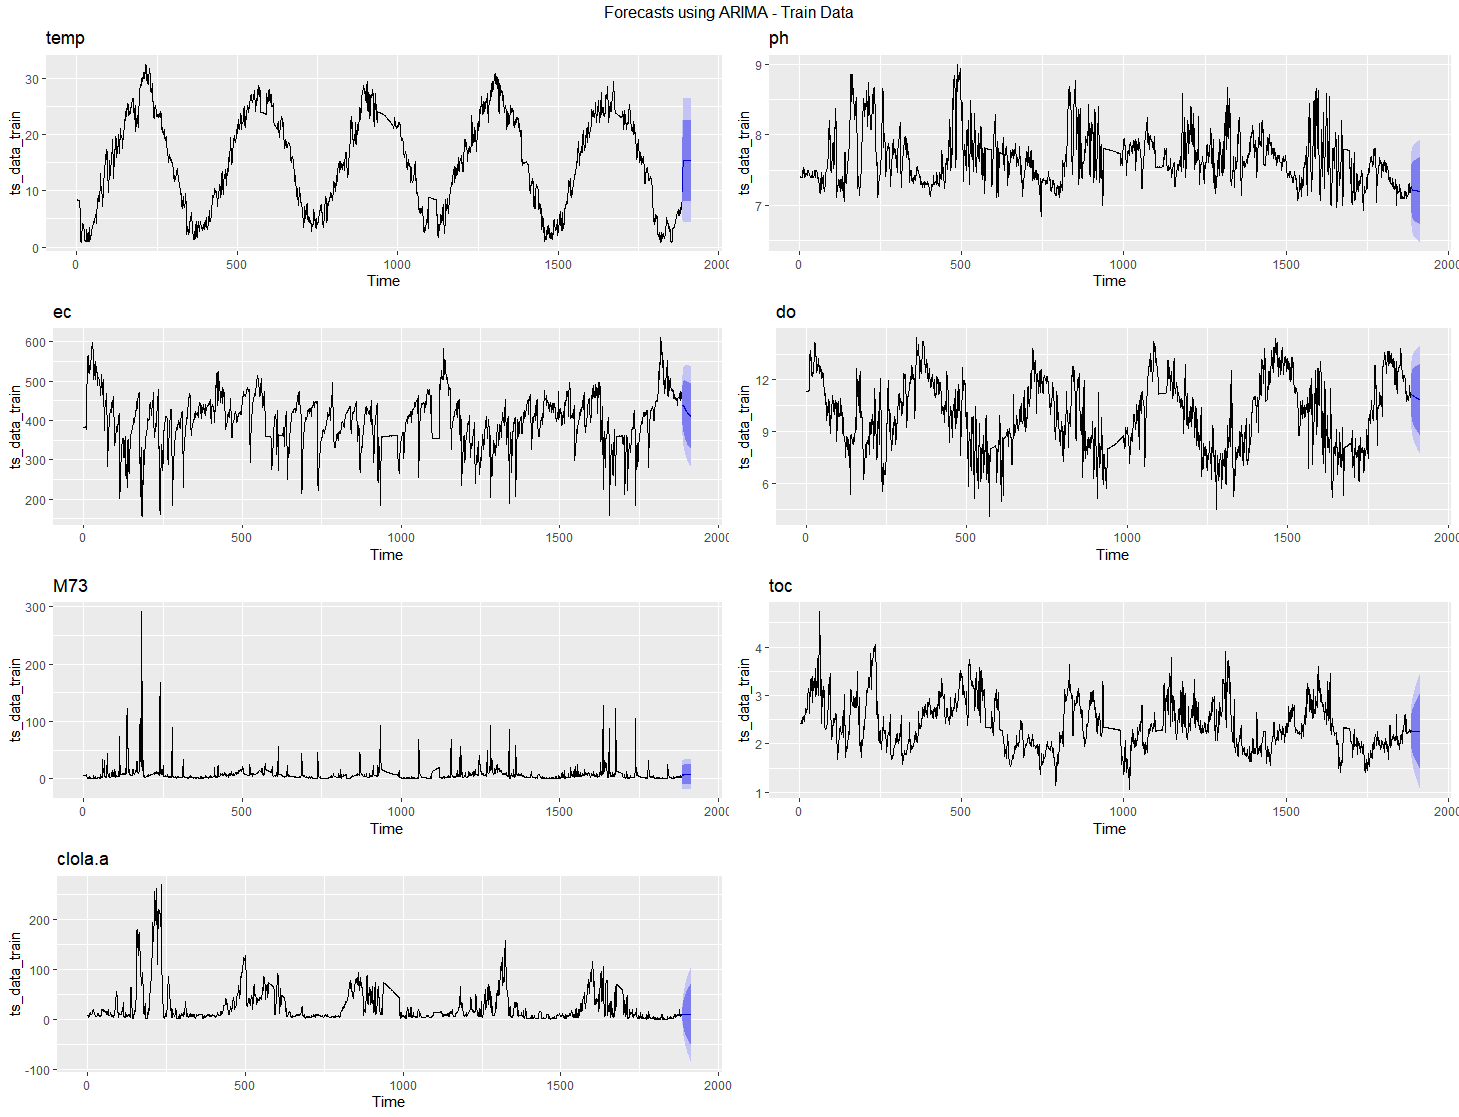

### 한강 Forecast + Test data 비교

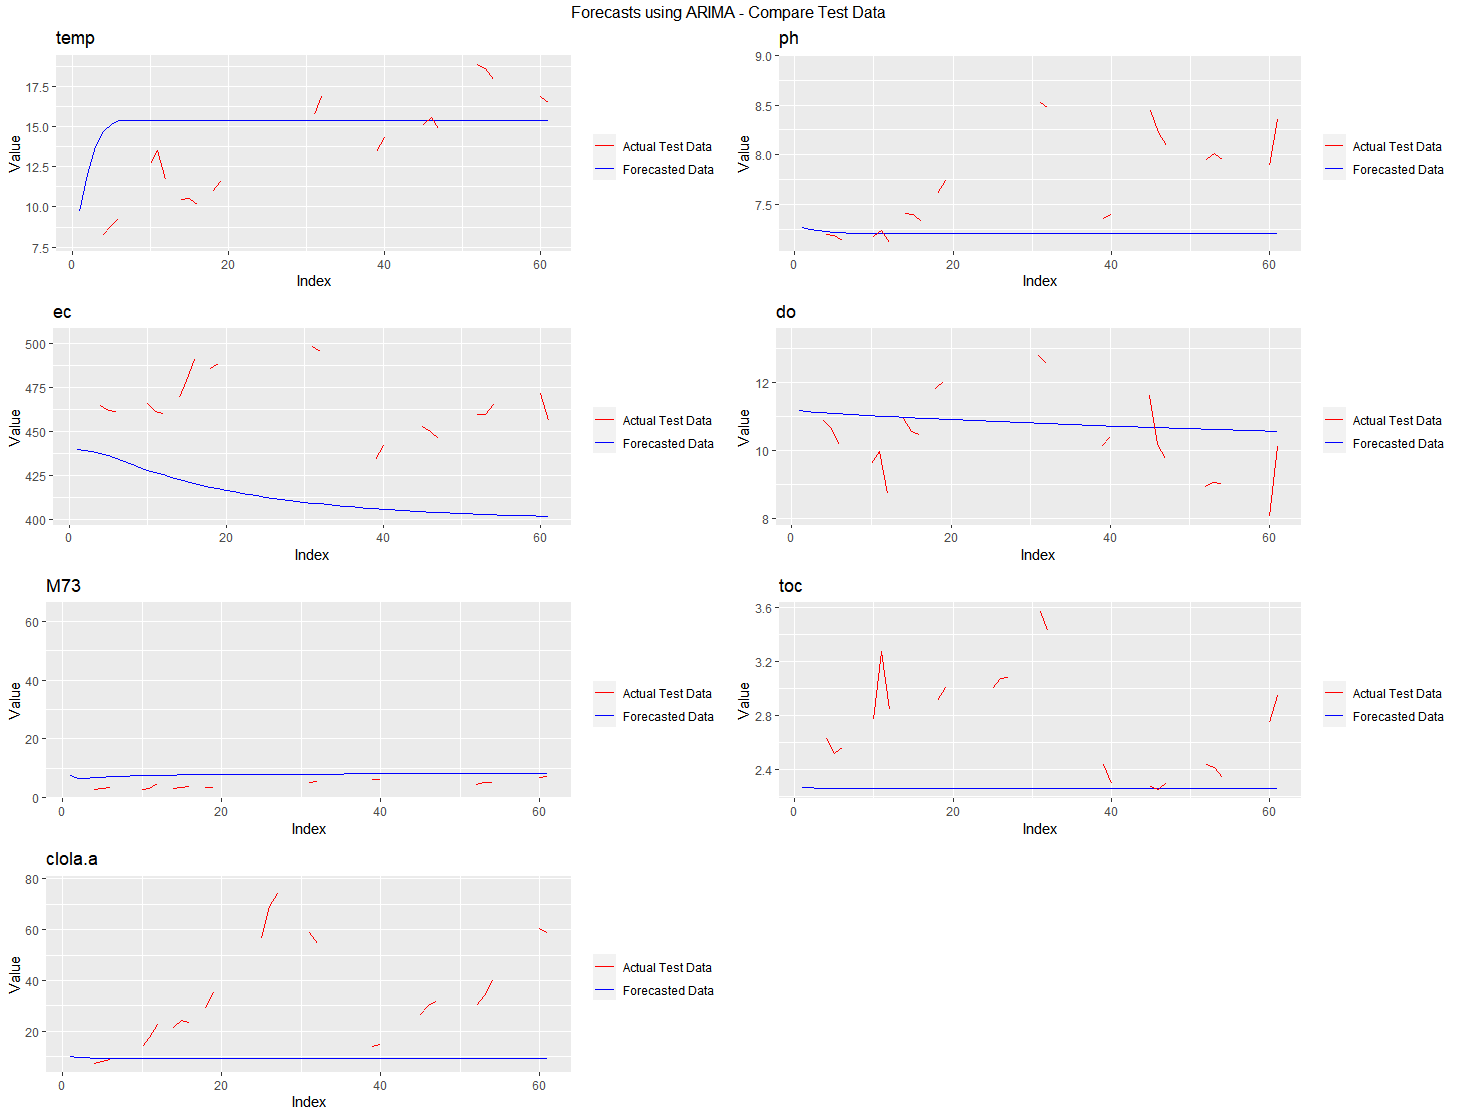

### Test set 에 대한 지표

In [ ]:
$temp
                ME     RMSE      MAE       MPE     MAPE ACF1 Theil's U
Test set -1.387388 3.157854 2.559057 -15.62655 22.28393    1  6.039135

$ph
                ME      RMSE       MAE      MPE     MAPE     ACF1 Theil's U
Test set 0.6209879 0.8139036 0.6468035 7.523122 7.884651 0.770707  4.262884

$ec
               ME     RMSE      MAE      MPE     MAPE      ACF1 Theil's U
Test set 55.79715 59.23875 55.79715 11.76595 11.76595 0.7605348  7.755068

$do
                ME     RMSE      MAE       MPE     MAPE      ACF1 Theil's U
Test set -0.156432 1.321873 1.130549 -3.014882 10.85974 0.5254562  1.312782

$M73
                 ME    RMSE      MAE       MPE     MAPE       ACF1 Theil's U
Test set -0.9993241 10.7856 4.824115 -72.06487 78.09449 0.05366649  5.415745

$toc
                ME      RMSE      MAE      MPE     MAPE ACF1 Theil's U
Test set 0.5118618 0.6138939 0.512684 17.22905 17.26559    1  2.956595

$clola.a
               ME     RMSE      MAE      MPE     MAPE      ACF1 Theil's U
Test set 27.19134 34.74355 27.42515 60.01428 63.06554 0.7664287  4.870961
